5장 성능 향상

In [ ]:
# 예제 5.1 (a) 가중치 수(3계층 구조, 바이어스 없는 경우)

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28), name='Input_Layer'),
    Dense(100, activation='relu', use_bias=False, name='Hidden_Layer'),
    Dense(10, activation='softmax', use_bias=False, name='Output_Layer')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer (Dense)        (None, 100)               78400     
                                                                 
 Output_Layer (Dense)        (None, 10)                1000      
                                                                 
Total params: 79,400
Trainable params: 79,400
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 예제 5.1 (b) 가중치 수(VGG의 마지막 3계층 구조, 바이어스 없는 경우)

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(4096, activation='relu', use_bias=False, input_shape=(4096, )),
    Dense(1000, activation='softmax', use_bias=False )
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              16777216  
                                                                 
 dense_1 (Dense)             (None, 1000)              4096000   
                                                                 
Total params: 20,873,216
Trainable params: 20,873,216
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 예제 5.6 성능 평가(이진 분류) Fashion_MNIST(4(coat)/6(shirts)

# 셋업
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 준비
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


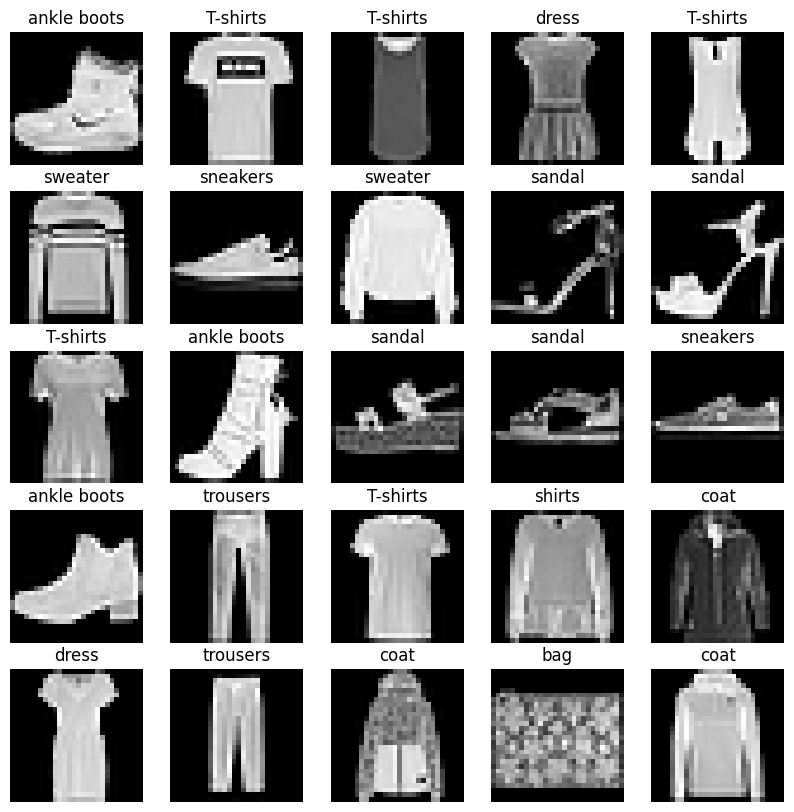

In [ ]:
# 학습 데이터 시각화(클래스명 표시)
class_names = ['T-shirts', 'trousers', 'sweater', 'dress', 'coat',
               'sandal', 'shirts', 'sneakers', 'bag', 'ankle boots']

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[int(y_train[i])])   # 레이블(클래스명) 표시
    plt.axis('off')

plt.show()

In [ ]:
# 레이블 5(sandal)/7(sneakers) 샘플 추출
index = (y_train == 5) | (y_train == 7)
x_train = x_train[index]
y_train = (y_train[index] == 5).astype(int)   # 레이블 1(5)/0(7) 재지정

index = (y_test == 5) | (y_test == 7)
x_test = x_test[index]
y_test = (y_test[index] == 5).astype(int)

# 추출한 샘플의 분포 확인
num_train_1 = np.sum(y_train == 1)   # 레이블 1인 샘플 수
num_train_0 = np.sum(y_train == 0)   # 레이블 0인 샘플 수

num_test_1 = np.sum(y_test == 1)
num_test_0 = np.sum(y_test == 0)

print(num_train_1, num_train_0)
print(num_test_1, num_test_0)

6000 6000
1000 1000


In [ ]:
# 데이터 정규화
x_train, x_test = x_train / 255., x_test / 255.

In [ ]:
# 모델 생성
inputs = Input(shape=(28, 28))
x = Flatten()(inputs)
x = Dense(16, activation='relu')(x)           # 은닉층 뉴런 16개
outputs = Dense(1, activation='sigmoid')(x)   # 출력층 뉴런 1개

model = Model(inputs, outputs)

In [ ]:
# 모델 컴파일
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
# 모델 학습
history = model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=0,
          validation_split=0.2)   # 학습 데이터/검증 데이터 분할 비율 0.2

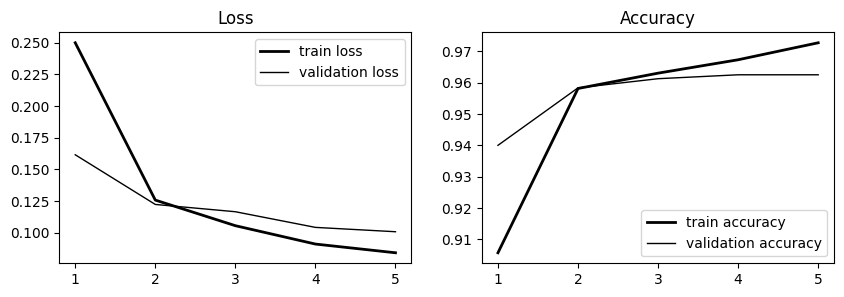

In [ ]:
# 학습 결과 시각화
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

axs[0].plot(range(1, len(history.history['loss']) + 1),
            history.history['loss'], label='train loss',
            color='black', linewidth=2)
axs[0].plot(range(1, len(history.history['val_loss']) + 1),
            history.history['val_loss'], label='validation loss',
            color='black', linewidth=1)
axs[0].set_title('Loss')
axs[0].legend(loc='best')

axs[1].plot(range(1, len(history.history['accuracy']) + 1),
            history.history['accuracy'], label='train accuracy',
            color='black', linewidth=2)
axs[1].plot(range(1, len(history.history['val_accuracy']) + 1),
            history.history['val_accuracy'], label='validation accuracy',
            color='black', linewidth=1)
axs[1].set_title('Accuracy')
axs[1].legend(loc='best')

plt.show()

63/63 [==============================] - 0s 2ms/step
y_test: [1 0 1 0 1]
y_pred: [1 0 1 0 1]


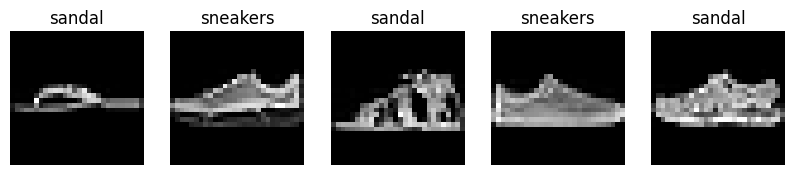

In [ ]:
# 모델 예측(임계치에 따라 0/1 판단)
class_names = ['sneakers', 'sandal']   # 클래스명

threshold = 0.5   # 임계치 0.5
y_pred = (model.predict(x_test) >= threshold).astype(int)

print(f"y_test: {y_test[:5]}")               # 테스트 데이터 레이블 확인
print(f"y_pred: {y_pred[:5].reshape(-1)}")   # 예측한 레이블 확인

# 예측 결과 시각화
plt.figure(figsize=(10, 10))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(class_names[int(y_pred[i])])   # 예측한 클래스명 표시
    plt.axis('off')

plt.show()

confusion matrix 
 [[978  22]
 [ 47 953]]
accuracy: 0.97
precision: 0.98
sensitivity(recall): 0.95
specificity: 0.98
f1 score: 0.97
AUC: 0.97


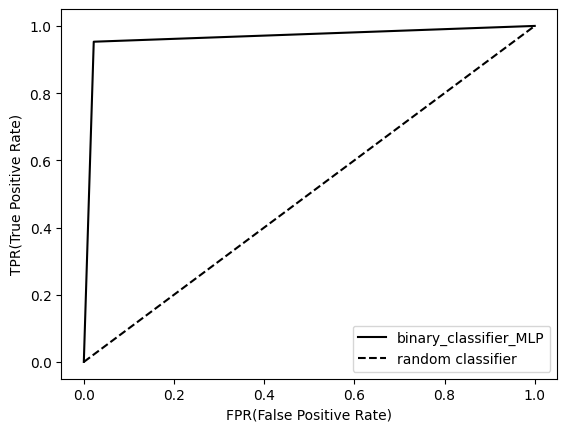

In [ ]:
#성능 평가 지표 출력
def specificity_score(y_test, y_pred):   # 특이도 함수 정의
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return tn / (tn + fp)

print(f"confusion matrix \n {confusion_matrix(y_test, y_pred)}")
print(f"accuracy: {accuracy_score(y_test, y_pred).round(2)}")
print(f"precision: {precision_score(y_test, y_pred).round(2)}")
print(f"sensitivity(recall): {recall_score(y_test, y_pred).round(2)}")
print(f"specificity: {specificity_score(y_test, y_pred).round(2)}")
print(f"f1 score: {f1_score(y_test, y_pred).round(2)}")
print(f"AUC: {roc_auc_score(y_test, y_pred).round(2)}")

# ROC 곡선 출력
fpr, tpr, thresholds = roc_curve(y_test, y_pred)      # fpr/tpr 값 계산

plt.plot(fpr, tpr, label='binary_classifier_MLP', color='black')   # ROC 곡선
plt.plot([0, 1], [0, 1], '--', label='random classifier', color='black')
plt.xlabel('FPR(False Positive Rate)')
plt.ylabel('TPR(True Positive Rate)')
plt.legend(loc='lower right')

plt.show()